## Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import missingno as msno
from zipfile import ZipFile as zf
import random
#import sklearn.metrics       as Metrics

from sklearn.impute import SimpleImputer

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#df = pd.read_csv("/mnt/workstation/data/input_Pesos_Dic_20.csv")#, sep= ",", names =header)
topten = pd.read_csv("/mnt/workstation/data/Input_Topten.csv")
middleten = pd.read_csv("/mnt/workstation/data/Aggregate_20_30.csv")
lastten = pd.read_csv("/mnt/workstation/data/Aggregate_last_10_v2.csv")
labels = pd.read_csv("/mnt/workstation/data/labels.csv")

In [3]:
topten.columns

Index(['id_cli', 'edad', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cupo_total_tc', 'codigo_ciiu', 'ctas_activas', 'ctas_embargadas',
       'mediana_nom3', 'genero', 'estado_civil', 'nivel_academico',
       'profesion', 'ocupacion', 'tipo_vivienda', 'ciudad_residencia',
       'departamento_residencia', 'ciudad_laboral', 'departamento_laboral',
       'rechazo_credito', 'cat_ingreso', 'rep_calif_cred', 'ind_mora_vigente',
       'cartera_castigada', 'tenencia_tc', 'tiene_consumo', 'tiene_crediagil',
       'tiene_ctas_activas', 'tiene_ctas_embargadas', 'pension_fopep',
       'tiene_cred_hipo_1', 'tiene_cred_hipo_2'],
      dtype='object')

In [4]:
topten = topten.drop(columns=['departamento_residencia',
                                    'ciudad_laboral',
                                    'departamento_laboral',
                                ], axis=0)

In [5]:
middleten.columns

Index(['Unnamed: 0', 'id_cli', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'periodo', 'ctas_activas',
       'ctas_embargadas', 'cupo_tc_mdo', 'saldo_prom3_tdc_mdo',
       'mediana_nom3_desv', 'mediana_pen3_desv', 'ingreso_nompen_desv',
       'ingreso_final_desv', 'ingreso_nompen', 'ingreso_final',
       'cuota_de_vivienda', 'cuota_de_consumo', 'cuota_rotativos',
       'cuota_de_sector_solidario', 'cuota_sector_real_comercio'],
      dtype='object')

In [6]:
middleten = middleten.drop(columns=['ctas_activas',
                                'ctas_embargadas',
                                'saldo_prom3_tdc_mdo',
                                'cupo_tc_mdo'
                                ], axis=0)

In [7]:
lastten.columns

Index(['Unnamed: 0', 'id_cli', 'pol_centr_ext', 'saldo_prom3_tdc_mdo',
       'cupo_tc_mdo', 'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr',
       'saldo_no_rot_mdo', 'ind', 'gasto_familiar'],
      dtype='object')

In [8]:
topten.shape

(1047955, 31)

In [9]:
df_Xcli = topten.merge(middleten.iloc[:,1:], on="id_cli", how='left')
df_Xcli.shape

(1047955, 45)

In [10]:
df_Xcli = df_Xcli.merge(lastten.iloc[:,1:], on="id_cli", how='left')
df_Xcli.shape

(1092553, 53)

In [11]:
df_Xcli['mora_max'] = df_Xcli['mora_max'].replace(np.nan,0)
df_Xcli['cant_moras_30_ult_12_meses'] = df_Xcli['cant_moras_30_ult_12_meses'].replace(np.nan,0)
df_Xcli['cant_moras_60_ult_12_meses'] = df_Xcli['cant_moras_60_ult_12_meses'].replace(np.nan,0)
df_Xcli['cant_moras_90_ult_12_meses'] = df_Xcli['cant_moras_90_ult_12_meses'].replace(np.nan,0)

In [12]:
features = pd.DataFrame(df_Xcli.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [13]:
for i in features_b:
    df_Xcli[i] = df_Xcli[i].astype('int')

In [14]:
features = pd.DataFrame(df_Xcli.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [15]:
df_Xcli[features_o].describe(include='all').T

,count,unique,top,freq
genero,1092553,2,M,553563
estado_civil,989920,5,SOLTERO,502678
nivel_academico,766519,6,UNIVERSITARIO,394773
profesion,781022,79,OTROS,310316
ocupacion,1089270,10,Empleado,694398
tipo_vivienda,514095,3,FAMILIAR,249857
ciudad_residencia,1091950,1434,BOGOTA D.C.,277839
rechazo_credito,3221,4,RECHAZO BIZAGI,2930
cat_ingreso,420300,3,NOM,354067
rep_calif_cred,996808,8,A,228390


In [16]:
df_Xcli[features_f].describe().T

,count,mean,std,min,25%,50%,75%,max
id_cli,1092553.0,3.393948e+06,2.464174e+06,3.000000e+00,1.371651e+06,2.891867e+06,4.943863e+06,8.704800e+06
edad,1092553.0,4.195407e+01,1.371779e+01,1.900000e+01,3.100000e+01,3.900000e+01,5.000000e+01,1.200000e+02
mora_max,1092553.0,7.945507e+00,3.066101e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.367000e+03
cant_moras_30_ult_12_meses,1092553.0,1.395511e-01,8.225322e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cant_moras_60_ult_12_meses,1092553.0,7.345181e-02,6.372929e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cant_moras_90_ult_12_meses,1092553.0,4.877658e-02,5.274117e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cupo_total_tc,1092553.0,4.334337e+06,1.015524e+07,0.000000e+00,0.000000e+00,0.000000e+00,4.692872e+06,5.451097e+08
codigo_ciiu,1092553.0,8.954377e+02,2.298903e+03,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,9.900000e+03
ctas_activas,1092552.0,1.049426e+00,4.029919e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.200000e+01
ctas_embargadas,1092552.0,3.173304e-03,5.974634e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00


Text(199.0, 0.5, 'rows')

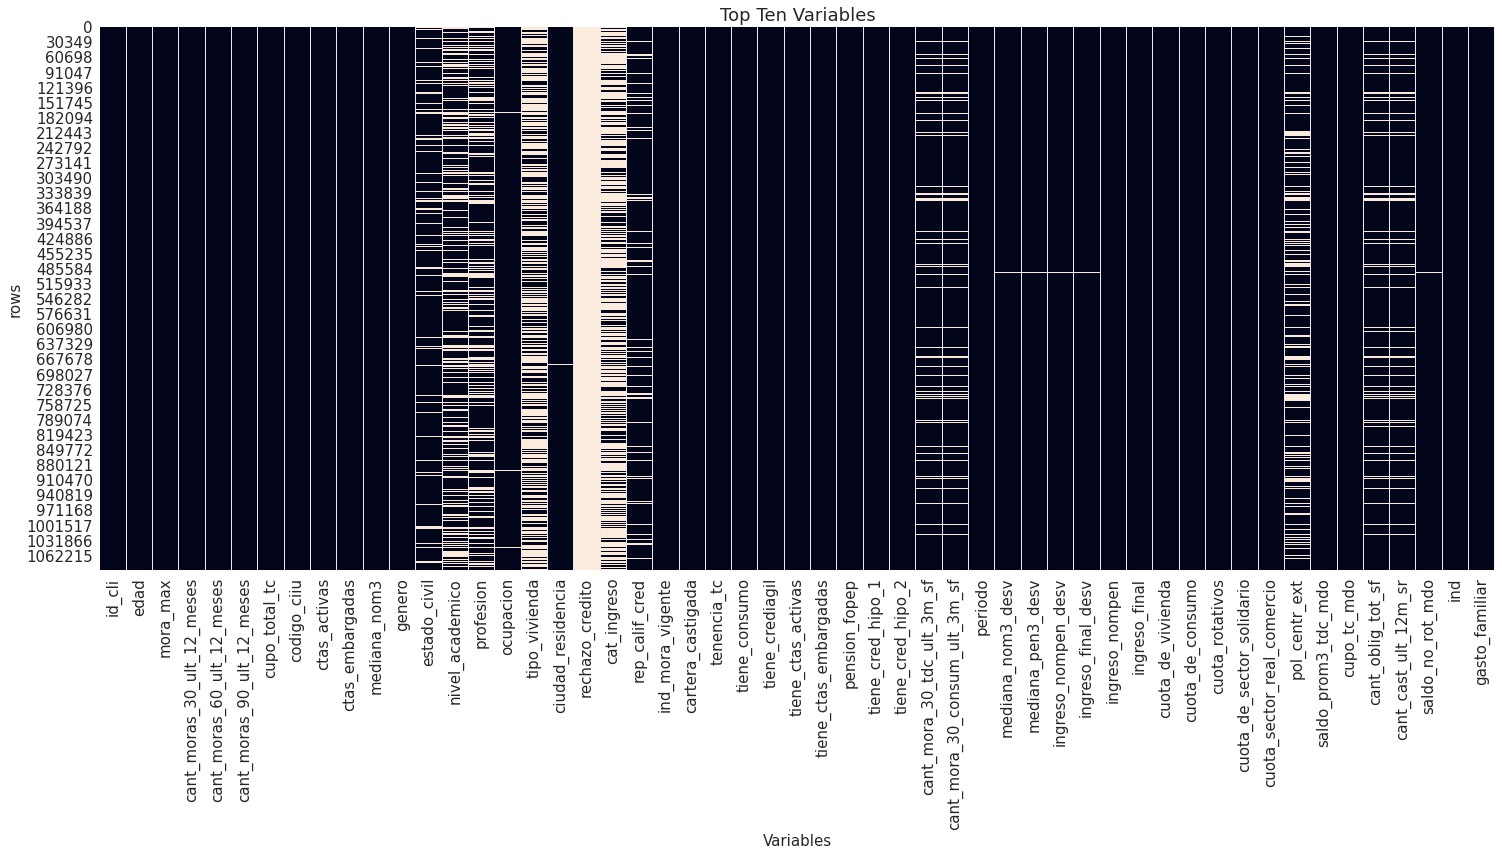

In [17]:
sns.set_style('darkgrid')
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25,10))
sns.heatmap(df_Xcli.isnull(), cbar=False)
plt.title("Top Ten Variables")
plt.xlabel('Variables')
plt.ylabel('rows')

In [18]:
Nulos = 100*df_Xcli.isnull().sum()/df_Xcli.shape[0]
Nulos = pd.DataFrame(Nulos)
variables_nulas = Nulos[Nulos[0]>30]
variables_nulas

,0
tipo_vivienda,52.945532
rechazo_credito,99.705186
cat_ingreso,61.530470


In [19]:
df_Xcli = df_Xcli.drop(list(variables_nulas.index), axis=1)
df_Xcli.shape

(1092553, 50)

In [20]:
Nulos = 100*df_Xcli.isnull().sum()/df_Xcli.shape[0]
Nulos

id_cli                            0.000000
edad                              0.000000
mora_max                          0.000000
cant_moras_30_ult_12_meses        0.000000
cant_moras_60_ult_12_meses        0.000000
cant_moras_90_ult_12_meses        0.000000
cupo_total_tc                     0.000000
codigo_ciiu                       0.000000
ctas_activas                      0.000092
ctas_embargadas                   0.000092
mediana_nom3                      0.000000
genero                            0.000000
estado_civil                      9.393869
nivel_academico                  29.841481
profesion                        28.514040
ocupacion                         0.300489
ciudad_residencia                 0.055192
rep_calif_cred                    8.763419
ind_mora_vigente                  0.000000
cartera_castigada                 0.000000
tenencia_tc                       0.000000
tiene_consumo                     0.000000
tiene_crediagil                   0.000000
tiene_ctas_

## Missing Values Treatment

In [21]:
Nulos = pd.DataFrame(Nulos)
Nulos.columns = ['%Null']
Variables_Completar = Nulos[Nulos['%Null']>0]
Variables_Completar

,%Null
ctas_activas,0.000092
ctas_embargadas,0.000092
estado_civil,9.393869
nivel_academico,29.841481
profesion,28.514040
ocupacion,0.300489
ciudad_residencia,0.055192
rep_calif_cred,8.763419
cant_mora_30_tdc_ult_3m_sf,8.742276
cant_mora_30_consum_ult_3m_sf,8.742276


In [22]:
df_Xcli[Variables_Completar.index]

,ctas_activas,ctas_embargadas,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,mediana_nom3_desv,mediana_pen3_desv,ingreso_nompen_desv,ingreso_final_desv,ingreso_final,pol_centr_ext,cant_oblig_tot_sf,cant_cast_ult_12m_sr,saldo_no_rot_mdo
0,1.0,0.0,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,CALI,C,0.0,0.0,481996.739440,0.0,491847.360102,1.008436e+05,1.244439e+06,0.0,0.0,0.0,9.878612e+05
1,1.0,0.0,UNION LIBRE,UNIVERSITARIO,VETERINARIA,Independiente,GARZON,D,0.0,0.0,0.000000,0.0,0.000000,2.263888e+06,6.297243e+06,0.0,3.0,0.0,7.296131e+05
2,1.0,0.0,UNION LIBRE,NaN,NaN,Independiente,PALMIRA,NaN,NaN,NaN,0.000000,0.0,0.000000,5.674718e+05,3.265615e+06,NaN,NaN,NaN,0.000000e+00
3,1.0,0.0,SOLTERO,NaN,OTROS,Empleado,BOGOTA D.C.,D,0.0,0.0,0.000000,0.0,0.000000,2.426446e+06,5.638513e+06,0.0,5.0,0.0,5.116462e+06
4,1.0,0.0,SOLTERO,TECNOLOGO,DISEÑO Y PUBLICIDAD,Independiente,BOGOTA D.C.,NaN,0.0,0.0,0.000000,0.0,0.000000,1.000554e+06,1.326788e+06,0.0,1.0,0.0,7.089265e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092548,1.0,0.0,SOLTERO,NaN,NaN,Independiente,BOGOTA D.C.,C,0.0,3.0,745144.950418,0.0,746763.442705,7.664217e+05,2.039754e+06,NaN,2.0,2.0,1.835454e+07
1092549,1.0,0.0,DIVORCIADO,NaN,NaN,Empleado,BOGOTA D.C.,D,0.0,0.0,0.000000,0.0,0.000000,2.406212e+06,2.466293e+06,0.0,0.0,0.0,6.270296e+05
1092550,1.0,0.0,DIVORCIADO,NaN,NaN,Empleado,BOGOTA D.C.,D,0.0,0.0,0.000000,0.0,0.000000,2.406212e+06,2.466293e+06,0.0,2.0,0.0,6.270296e+05
1092551,1.0,0.0,UNION LIBRE,NaN,NaN,Empleado,APARTADO,H,0.0,0.0,246876.688223,0.0,242566.586777,1.591441e+05,2.182528e+06,0.0,2.0,0.0,2.940265e+04


In [23]:
features = pd.DataFrame(df_Xcli[Variables_Completar.index].dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

## Categorical Variables

In [24]:
100*df_Xcli[features_o].isnull().sum()/df_Xcli.shape[0]

estado_civil          9.393869
nivel_academico      29.841481
profesion            28.514040
ocupacion             0.300489
ciudad_residencia     0.055192
rep_calif_cred        8.763419
dtype: float64

In [25]:
imp = SimpleImputer(strategy="most_frequent")
imp.fit(df_Xcli[features_o])
imputed_cat_training = imp.transform(df_Xcli[features_o])
imputed_cat_training

array([['DIVORCIADO', 'TECNOLOGO', 'TECNOLOGIA SISTEMAS', 'Empleado',
        'CALI', 'C'],
       ['UNION LIBRE', 'UNIVERSITARIO', 'VETERINARIA', 'Independiente',
        'GARZON', 'D'],
       ['UNION LIBRE', 'UNIVERSITARIO', 'OTROS', 'Independiente',
        'PALMIRA', 'A'],
       ...,
       ['DIVORCIADO', 'UNIVERSITARIO', 'OTROS', 'Empleado',
        'BOGOTA D.C.', 'D'],
       ['UNION LIBRE', 'UNIVERSITARIO', 'OTROS', 'Empleado', 'APARTADO',
        'H'],
       ['DIVORCIADO', 'UNIVERSITARIO', 'DERECHO', 'Independiente',
        'BOGOTA D.C.', 'F']], dtype=object)

In [26]:
df_Xcli[features_o] = imputed_cat_training

In [27]:
100*df_Xcli[features_o].isnull().sum()/df_Xcli.shape[0]

estado_civil         0.0
nivel_academico      0.0
profesion            0.0
ocupacion            0.0
ciudad_residencia    0.0
rep_calif_cred       0.0
dtype: float64

In [28]:
df_Xcli[features_o].describe(include='all').T

,count,unique,top,freq
estado_civil,1092553,5,SOLTERO,605311
nivel_academico,1092553,6,UNIVERSITARIO,720807
profesion,1092553,79,OTROS,621847
ocupacion,1092553,10,Empleado,697681
ciudad_residencia,1092553,1434,BOGOTA D.C.,278442
rep_calif_cred,1092553,8,A,324135


## Numerical variables

In [29]:
100*df_Xcli[features_f].isnull().sum()/df_Xcli.shape[0]

ctas_activas                      0.000092
ctas_embargadas                   0.000092
cant_mora_30_tdc_ult_3m_sf        8.742276
cant_mora_30_consum_ult_3m_sf     8.742276
mediana_nom3_desv                 0.155233
mediana_pen3_desv                 0.155233
ingreso_nompen_desv               0.155233
ingreso_final_desv                0.161182
ingreso_final                     0.007414
pol_centr_ext                    22.525040
cant_oblig_tot_sf                 9.735729
cant_cast_ult_12m_sr              9.735729
saldo_no_rot_mdo                  0.155233
dtype: float64

In [30]:
means = df_Xcli[features_f].mean(axis=0)
means

ctas_activas                     1.049426e+00
ctas_embargadas                  3.173304e-03
cant_mora_30_tdc_ult_3m_sf       9.136252e-02
cant_mora_30_consum_ult_3m_sf    2.182713e-01
mediana_nom3_desv                4.761795e+05
mediana_pen3_desv                1.514349e+04
ingreso_nompen_desv              4.961041e+05
ingreso_final_desv               1.452043e+06
ingreso_final                    4.932534e+06
pol_centr_ext                    6.994323e-01
cant_oblig_tot_sf                3.198402e+00
cant_cast_ult_12m_sr             1.241907e-01
saldo_no_rot_mdo                 8.407683e+06
dtype: float64

In [32]:
type(means)

pandas.core.series.Series

for i in features_f:
    index = df_Xcli[i].isnull().index
    df_Xcli[i] = df_Xcli.loc[index,i] = df_Xcli[i].mean(axis=1)

In [33]:
100*df_Xcli[features_f].isnull().sum()/df_Xcli.shape[0]

ctas_activas                      0.000092
ctas_embargadas                   0.000092
cant_mora_30_tdc_ult_3m_sf        8.742276
cant_mora_30_consum_ult_3m_sf     8.742276
mediana_nom3_desv                 0.155233
mediana_pen3_desv                 0.155233
ingreso_nompen_desv               0.155233
ingreso_final_desv                0.161182
ingreso_final                     0.007414
pol_centr_ext                    22.525040
cant_oblig_tot_sf                 9.735729
cant_cast_ult_12m_sr              9.735729
saldo_no_rot_mdo                  0.155233
dtype: float64

In [34]:
df_Xcli[features_f].describe().T

,count,mean,std,min,25%,50%,75%,max
ctas_activas,1092552.0,1.049426e+00,4.029919e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.200000e+01
ctas_embargadas,1092552.0,3.173304e-03,5.974634e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
cant_mora_30_tdc_ult_3m_sf,997039.0,9.136252e-02,3.846190e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01
cant_mora_30_consum_ult_3m_sf,997039.0,2.182713e-01,1.060505e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.440000e+02
mediana_nom3_desv,1090857.0,4.761795e+05,1.155667e+06,0.000000,0.000000e+00,0.000000e+00,6.166039e+05,1.540409e+08
mediana_pen3_desv,1090857.0,1.514349e+04,2.714620e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.886119e+08
ingreso_nompen_desv,1090857.0,4.961041e+05,1.199063e+06,0.000000,0.000000e+00,2.579954e+04,6.413048e+05,1.908578e+08
ingreso_final_desv,1090792.0,1.452043e+06,4.530007e+06,14.893226,3.268678e+05,7.292920e+05,1.499981e+06,1.430676e+09
ingreso_final,1092472.0,4.932534e+06,1.267140e+07,93401.569016,1.832280e+06,2.909860e+06,4.986787e+06,3.193947e+09
pol_centr_ext,846455.0,6.994323e-01,2.149996e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01


## Labeling

In [35]:
labels

,Categoria,Particip,Variable,Label,Var_mean
0,CASADO,9.678370e+05,estado_civil,5,gasto_familiar
1,UNION LIBRE,8.678049e+05,estado_civil,4,gasto_familiar
2,DIVORCIADO,7.881397e+05,estado_civil,3,gasto_familiar
3,VIUDO,6.969590e+05,estado_civil,2,gasto_familiar
4,SOLTERO,6.912766e+05,estado_civil,1,gasto_familiar
...,...,...,...,...,...
9109,D,1.101550e+06,rep_calif_cred,5,ingreso_nompen
9110,F,1.099701e+06,rep_calif_cred,4,ingreso_nompen
9111,G,1.099355e+06,rep_calif_cred,3,ingreso_nompen
9112,H,1.095841e+06,rep_calif_cred,2,ingreso_nompen


In [72]:
a = 'Categoria == {} & Variable =={} & Var_mean == "gasto_familiar"'.format('"SOLTERO"','"estado_civil"')
df_Xcli['estado_civil'] = df_Xcli['estado_civil'].replace('SOLTERO',
                                                        labels[labels['Var_mean']=='gasto_familiar'].loc[labels.query(a).index,'Label'].iloc[0])

In [83]:
df_Xcli.columns

Index(['id_cli', 'edad', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cupo_total_tc', 'codigo_ciiu', 'ctas_activas', 'ctas_embargadas',
       'mediana_nom3', 'genero', 'estado_civil', 'nivel_academico',
       'profesion', 'ocupacion', 'ciudad_residencia', 'rep_calif_cred',
       'ind_mora_vigente', 'cartera_castigada', 'tenencia_tc', 'tiene_consumo',
       'tiene_crediagil', 'tiene_ctas_activas', 'tiene_ctas_embargadas',
       'pension_fopep', 'tiene_cred_hipo_1', 'tiene_cred_hipo_2',
       'cant_mora_30_tdc_ult_3m_sf', 'cant_mora_30_consum_ult_3m_sf',
       'periodo', 'mediana_nom3_desv', 'mediana_pen3_desv',
       'ingreso_nompen_desv', 'ingreso_final_desv', 'ingreso_nompen',
       'ingreso_final', 'cuota_de_vivienda', 'cuota_de_consumo',
       'cuota_rotativos', 'cuota_de_sector_solidario',
       'cuota_sector_real_comercio', 'pol_centr_ext', 'saldo_prom3_tdc_mdo',
       'cupo_tc_mdo', 'cant_oblig_to

In [86]:
df_Xcli[Var]

0           DIVORCIADO
1          UNION LIBRE
2          UNION LIBRE
3                    1
4                    1
              ...     
1092548              1
1092549     DIVORCIADO
1092550     DIVORCIADO
1092551    UNION LIBRE
1092552     DIVORCIADO
Name: estado_civil, Length: 1092553, dtype: object

In [96]:
str(Var)

'"estado_civil"'

In [95]:
Cat = '"UNION LIBRE"'
Var = '"estado_civil"'
Var_mean = 'gasto_familiar'

a = 'Categoria == {} & Variable == {} & Var_mean == {}'.format(Cat,Var,Var_mean)
df_Xcli[Var] = df_Xcli[Var].replace(Cat,
                                labels[labels['Var_mean']==Var_mean].loc[labels.query(a).index,'Label'].iloc[0])

KeyError: '"estado_civil"'

In [92]:
a

'Categoria == "UNION LIBRE" & Variable ==estado_civil & Var_mean == gasto_familiar'

In [93]:
labels.query(a).index

UndefinedVariableError: name 'estado_civil' is not defined

In [71]:
df_Xcli[features_o].describe(include='all').T

,count,unique,top,freq
estado_civil,1092553,5,1,605311
nivel_academico,1092553,6,UNIVERSITARIO,720807
profesion,1092553,79,OTROS,621847
ocupacion,1092553,10,Empleado,697681
ciudad_residencia,1092553,1434,BOGOTA D.C.,278442
rep_calif_cred,1092553,8,A,324135
